# Determinación distancia entre dos bases de datos

## 0. Se cargan las bibliotecas

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## 1. Se leen los datos y se definen los parametros relevantes

In [2]:
# Datos de AMB
data_AMB = pd.read_excel("datos_procesados_local_amb.xlsx")

# Datos de los sensores low cost
data_LOW_COST = pd.read_excel("datos_procesados_local_low_cost.xlsx")

In [3]:
data_AMB

,Time,AMB
0,2018-10-01 00:00:00,6.4
1,2018-10-01 01:00:00,6.4
2,2018-10-01 02:00:00,6.7
3,2018-10-01 03:00:00,6
4,2018-10-01 04:00:00,7.3
...,...,...
8025,2019-08-31 19:00:00,20.4
8026,2019-08-31 20:00:00,18.7
8027,2019-08-31 21:00:00,22.8
8028,2019-08-31 22:00:00,25.2


In [4]:
data_LOW_COST

,Time,Low-cost
0,2018-11-03 23:32:49.639,9.083333
1,2018-11-03 23:37:50.639,9.083333
2,2018-11-03 23:42:50.639,8.583334
3,2018-11-03 23:47:49.641,8.666667
4,2018-11-03 23:52:49.638,8.666666
...,...,...
5003,2019-09-01 00:02:50.912,6.166667
5004,2019-09-01 01:02:49.911,7.833333
5005,2019-09-01 02:02:49.912,5.416667
5006,2019-09-01 03:02:49.912,5.750000


In [5]:
# Se convierten las fechas a formato datetime

data_AMB['Time']      = pd.to_datetime(data_AMB['Time'])
data_LOW_COST['Time'] = pd.to_datetime(data_LOW_COST['Time'])


# Se convierten en la columna de índices de los datos

data_AMB      = data_AMB.set_index('Time')
data_LOW_COST = data_LOW_COST.set_index('Time')

# Se eliminan las filas con ceros en los archivos
data_AMB      = data_AMB.dropna()
data_LOW_COST = data_LOW_COST.dropna()

In [6]:
# Parametros del código

## Intervalos inferior y superior del tiempo de AMB y low-cost
a1 = data_AMB.index[0]
b1 = data_AMB.index[-1]

a2 = data_LOW_COST.index[0]
b2 = data_LOW_COST.index[-1]

## Longitud de la ventana
l = datetime.timedelta(hours=5)

## Largo del paso
Eps = datetime.timedelta(hours=1)

## Lista que contendrá los errores entre los puntos promedios de low-cost y AMB
Errores = []

## 2. Analisis de los datos

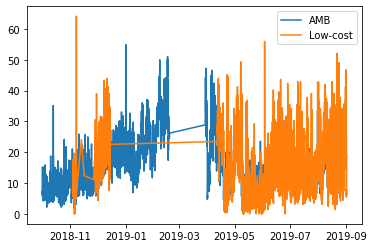

In [7]:
for i in range(len(data_AMB['AMB'])):
    if data_AMB['AMB'][i] == 'NoData':
        data_AMB['AMB'][i] = None
    if data_AMB['AMB'][i] == '---':
        data_AMB['AMB'][i] = None
    if data_AMB['AMB'][i] == '<Samp':
        data_AMB['AMB'][i] = None
data_AMB2 = data_AMB.dropna()
plt.plot(data_AMB2, label='AMB')
plt.plot(data_LOW_COST, label='Low-cost')
plt.legend()

In [8]:
Intervalos = []
aux = data_LOW_COST.index[0]
for i in range(len(data_LOW_COST)-1):
    if (data_LOW_COST.index[i+1] - data_LOW_COST.index[i]) > datetime.timedelta(hours=5):
        Intervalos.append([aux, data_LOW_COST.index[i]])
        aux = data_LOW_COST.index[i+1]
Intervalos.append([aux, data_LOW_COST.index[-1]])

aux = Intervalos.copy()
for i in range(len(Intervalos)):
    if Intervalos[i][0] == Intervalos[i][1]:
        aux.remove(Intervalos[i])
Intervalos = aux
Intervalos

[[Timestamp('2018-11-03 23:32:49.639000'),
  Timestamp('2018-11-05 23:47:49.256000')],
 [Timestamp('2018-11-06 20:08:58.465000'),
  Timestamp('2018-11-06 21:44:01.391000')],
 [Timestamp('2018-11-07 13:19:44.636000'),
  Timestamp('2018-11-07 16:01:06.779000')],
 [Timestamp('2018-11-27 16:04:21.138000'),
  Timestamp('2018-12-14 20:19:18.424000')],
 [Timestamp('2019-04-11 17:29:20.949000'),
  Timestamp('2019-04-14 18:02:50.829000')],
 [Timestamp('2019-04-15 02:06:50.826000'),
  Timestamp('2019-04-15 04:04:42.806000')],
 [Timestamp('2019-04-15 21:04:32.933000'),
  Timestamp('2019-04-24 03:02:52.699000')],
 [Timestamp('2019-04-25 06:37:04.991000'),
  Timestamp('2019-04-26 12:02:50.230000')],
 [Timestamp('2019-04-27 01:26:09.967000'),
  Timestamp('2019-06-05 13:03:01.770000')],
 [Timestamp('2019-06-05 23:26:26.603000'),
  Timestamp('2019-09-01 04:03:01.820000')]]

In [9]:
data_AMB2_reduce = pd.DataFrame({},columns=['Time','Low-cost'])
data_AMB2_reduce = data_AMB2_reduce.set_index('Time')
for i in range(len(data_AMB2)):
    date = data_AMB2.index[i] 
    for j in range(len(Intervalos)):
        if (date >= Intervalos[j][0]) and (date <= Intervalos[j][1]):
            data_AMB2_reduce = data_AMB2_reduce.append( pd.DataFrame({'Low-cost':float(data_AMB2.values[i][0])}, index=[date]) )
            break
            
data_AMB2_reduce

,Low-cost
2018-11-04 00:00:00,12.2
2018-11-04 01:00:00,12.6
2018-11-04 02:00:00,12.1
2018-11-04 03:00:00,8.8
2018-11-04 04:00:00,9.6
...,...
2019-08-31 19:00:00,20.4
2019-08-31 20:00:00,18.7
2019-08-31 21:00:00,22.8
2019-08-31 22:00:00,25.2


In [10]:
data_LOW_COST

,Low-cost
Time,
2018-11-03 23:32:49.639,9.083333
2018-11-03 23:37:50.639,9.083333
2018-11-03 23:42:50.639,8.583334
2018-11-03 23:47:49.641,8.666667
2018-11-03 23:52:49.638,8.666666
...,...
2019-09-01 00:02:50.912,6.166667
2019-09-01 01:02:49.911,7.833333
2019-09-01 02:02:49.912,5.416667


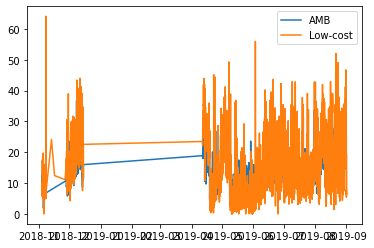

In [11]:
plt.plot(data_AMB2_reduce, label='AMB')
plt.plot(data_LOW_COST, label='Low-cost')
plt.legend()

## 3. Funciones y rutinas

In [44]:

def fun(): 
    M = len(data_AMB2_reduce)
    N = len(data_LOW_COST)

    width=int((b2-a2-l)/Eps)
    I = Intervalos[-2]

    aux1=0
    aux2=0
    for i in range(width):
        if (a2+Eps*i+l) > b2:
            break

        window = [a2+Eps*i, a2+Eps*i+l]
        list1 = []
        list2 = []

        date = window[0]
        if date >=I[0] and date<=I[1]:
            pass

        else:
            for j in range(aux1, M):
                date = data_AMB2_reduce.index[j]
                if (date >= window[0]) and (date <= window[1]):
                    list1.append(data_AMB2_reduce.values[j][0])
                elif date>= window[1]:
                    aux1 = int(j) 
                    break

            for k in range(aux2, N):
                date = data_LOW_COST.index[j]
                if (date >= window[0]) and (date <= window[1]):
                    list2.append(data_LOW_COST.values[k][0])
                elif date>= window[1]:
                    aux2 = int(k)
                    break

            Errores.append(abs(np.mean(list1)-np.mean(list2)))
            if i % int(width/5) < 1 and i>0:
                print(i/width*100,'%')

    sumaq=0
    for i in range(len(Errores)):
        sumaq += Errores[i]**2

    DISTANCIA = np.sqrt(sumaq)
    return DISTANCIA

In [ ]:
%time fun()

19.991693202270525 %
39.98338640454105 %
